# 교통 데이터 VDS 전처리  
- 머신러닝 모델
- 딥러닝 모델 사용

## I. 데이터 가져오기 
- 판다스를 이용하여 교통 데이터 가져오기

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings("ignore")

### 시계열 데이터 다루기
- RNN 실습시 필요함. 일단 받아들이세요.
- 시계열 데이터 : 년도-월-일 시간:분:초

In [3]:
from pandas import datetime

def parser(x):
    return datetime.strptime(x, '%Y-%m-%d %H:%M')
df = pd.read_csv('./daejeon_vds16.csv',  date_parser=parser)

In [4]:
df = pd.read_csv('./daejeon_vds16.csv')
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
0,2017-04-02 0:00,43,34,9,0,50.3,1.90
1,2017-04-02 0:05,45,32,13,0,58.9,1.84
2,2017-04-02 0:10,46,34,12,0,50.6,1.87
3,2017-04-02 0:15,45,36,9,0,50.9,1.72
4,2017-04-02 0:20,27,13,13,1,62.2,1.12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      8064 non-null   object 
 1   ToVol     8064 non-null   int64  
 2   SmVol     8064 non-null   int64  
 3   MeVol     8064 non-null   int64  
 4   LaVol     8064 non-null   int64  
 5   Speed     8064 non-null   float64
 6   Occ.Rate  8064 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 441.1+ KB


In [6]:
df.describe()

,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
count,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000,8064.000000
mean,110.459945,79.353299,29.948537,1.158110,49.327431,6.166941
std,63.954451,46.802106,19.081136,1.530192,7.921856,6.739946
min,6.000000,2.000000,0.000000,0.000000,9.100000,0.230000
25%,50.000000,35.000000,13.000000,0.000000,44.900000,2.140000
50%,122.000000,87.000000,29.000000,1.000000,48.500000,5.550000
75%,155.000000,111.000000,44.000000,2.000000,54.200000,7.290000
max,338.000000,250.000000,145.000000,16.000000,87.800000,82.100000


In [7]:
maxs = df.max()
print(maxs)

Date        2017-04-29 9:55
ToVol                   338
SmVol                   250
MeVol                   145
LaVol                    16
Speed                  87.8
Occ.Rate               82.1
dtype: object


In [8]:
df.tail()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate
8059,2017-04-29 23:35,45,35,10,0,51.3,2.01
8060,2017-04-29 23:40,47,33,14,0,53.9,1.89
8061,2017-04-29 23:45,32,28,4,0,50.6,1.36
8062,2017-04-29 23:50,31,21,10,0,59.3,1.40
8063,2017-04-29 23:55,39,33,6,0,52.5,1.74


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002443B696A88>],
      dtype=object)

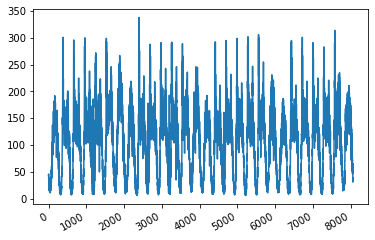

In [15]:
# 교통량 그림 그려보기
df_plt = df['ToVol']
df_plt.plot(subplots=True)

- 5분 간격 데이터를 하루 동안 수집하면 그 갯수는 12(1시간) * 24 = 288
- 하루 동안 데이터를 그려보자 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002443B6E24C8>],
      dtype=object)

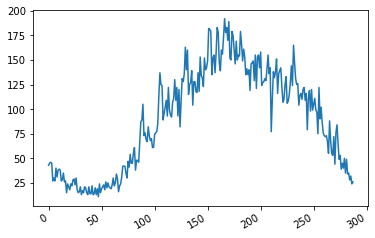

In [16]:
df_plt = df['ToVol'][:288]
df_plt.plot(subplots=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002443B93B908>],
      dtype=object)

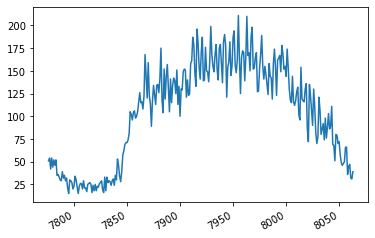

In [18]:
df_plt = df['ToVol'][-288:]
df_plt.plot(subplots=True)

### 2. 연습문제
#### 1) 속도 데이터를 이용하여 그래프를 그려자 
#### 2) 점유률에 대하여 그리프를 그려보자

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002443CBAF508>],
      dtype=object)

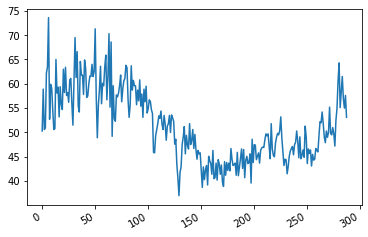

In [22]:
df_plt = df['Speed'][:288]
df_plt.plot(subplots=True)

## II. 라벨을 정하기
- 지도학습을 위해서 데이터를 Feature와 Label로 나누자.
- 무엇이 Feature이며 무엇이 Label 인가?
- 라벨은 무엇으로 정하는게 좋은가? 

In [23]:
def get_score(v):
    if v < 20:
        score = 'Jam'
    elif v < 40:
        score = 'Slow'
    else :
        score = 'Normal'
    return score

In [26]:
df["label_speed"] = df["Speed"].apply(lambda v: get_score(v))
df

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate,label_speed
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,Normal
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,Normal
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,Normal
3,2017-04-02 0:15,45,36,9,0,50.9,1.72,Normal
4,2017-04-02 0:20,27,13,13,1,62.2,1.12,Normal
...,...,...,...,...,...,...,...,...
8059,2017-04-29 23:35,45,35,10,0,51.3,2.01,Normal
8060,2017-04-29 23:40,47,33,14,0,53.9,1.89,Normal
8061,2017-04-29 23:45,32,28,4,0,50.6,1.36,Normal
8062,2017-04-29 23:50,31,21,10,0,59.3,1.40,Normal


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         8064 non-null   object 
 1   ToVol        8064 non-null   int64  
 2   SmVol        8064 non-null   int64  
 3   MeVol        8064 non-null   int64  
 4   LaVol        8064 non-null   int64  
 5   Speed        8064 non-null   float64
 6   Occ.Rate     8064 non-null   float64
 7   label_speed  8064 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 504.1+ KB


In [28]:
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate,label_speed
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,Normal
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,Normal
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,Normal
3,2017-04-02 0:15,45,36,9,0,50.9,1.72,Normal
4,2017-04-02 0:20,27,13,13,1,62.2,1.12,Normal


### 라벨을 위해 'label'의 텍스트는 범주형 혹은 숫자로 인코딩 해야한다

## 3. 데이터 가시화 

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("classic")

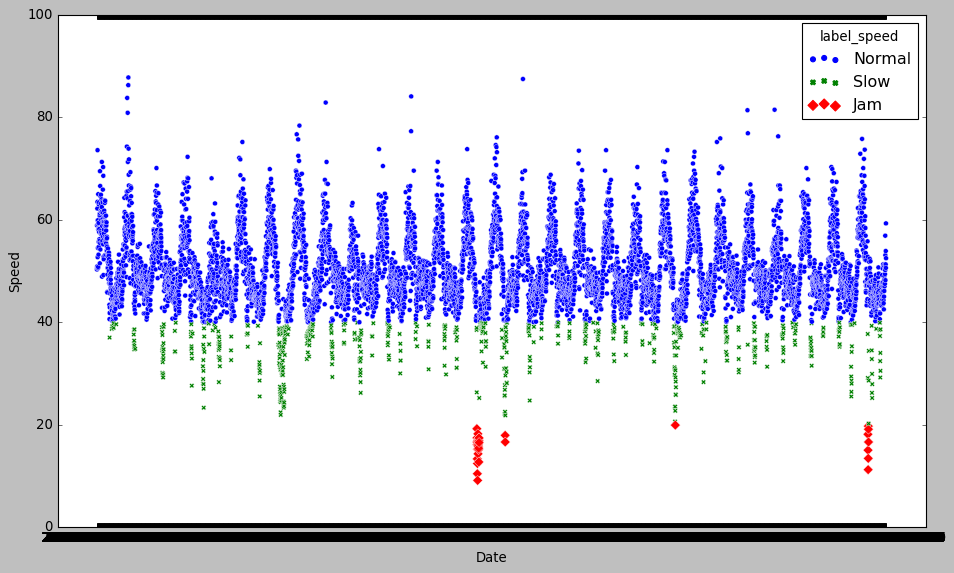

In [32]:
import seaborn as sns
plt.figure(figsize=(14,8))
sns.scatterplot(data=df, x = 'Date', y = 'Speed', hue='label_speed', style='label_speed')

In [33]:
df.head()

,Date,ToVol,SmVol,MeVol,LaVol,Speed,Occ.Rate,label_speed
0,2017-04-02 0:00,43,34,9,0,50.3,1.90,Normal
1,2017-04-02 0:05,45,32,13,0,58.9,1.84,Normal
2,2017-04-02 0:10,46,34,12,0,50.6,1.87,Normal
3,2017-04-02 0:15,45,36,9,0,50.9,1.72,Normal
4,2017-04-02 0:20,27,13,13,1,62.2,1.12,Normal


In [34]:
# df.set_index('Date', inplace=True)

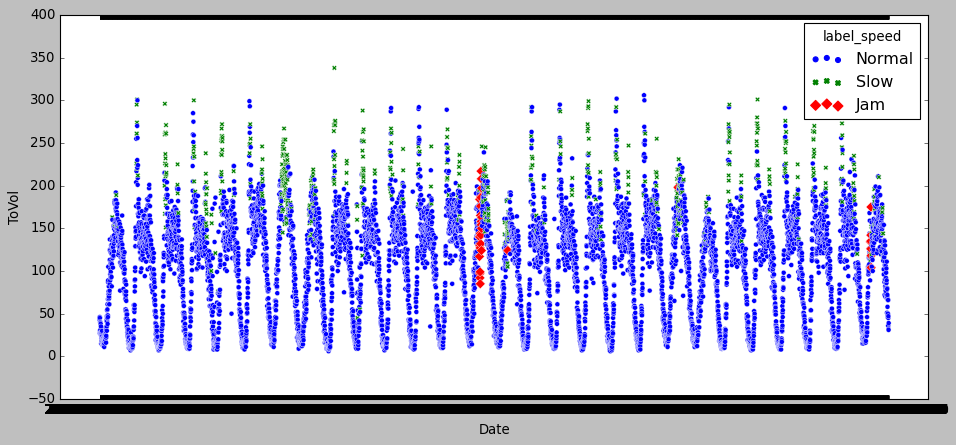

In [35]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x = 'Date', y = 'ToVol', hue='label_speed', style='label_speed')

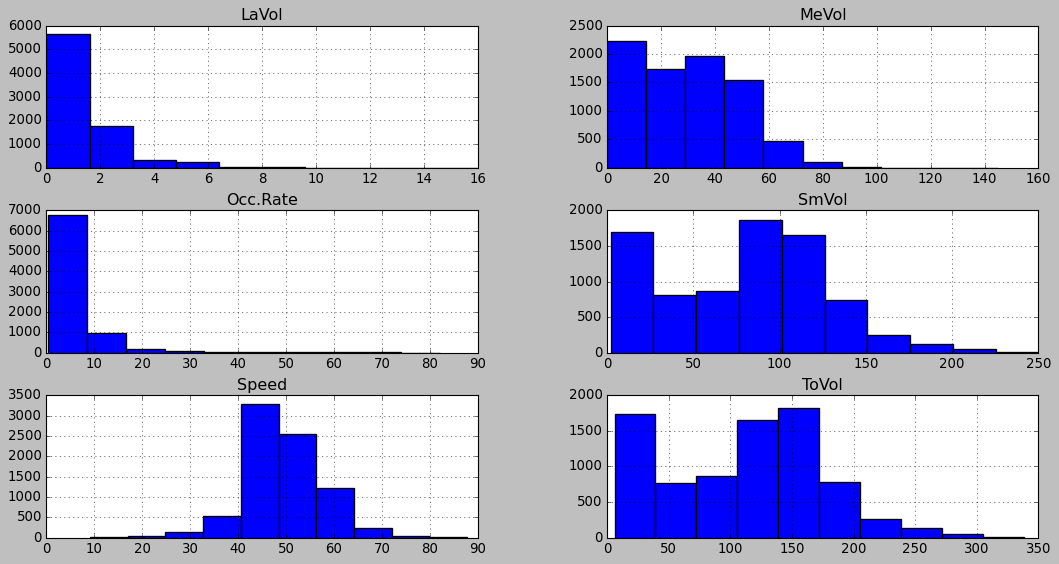

In [36]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

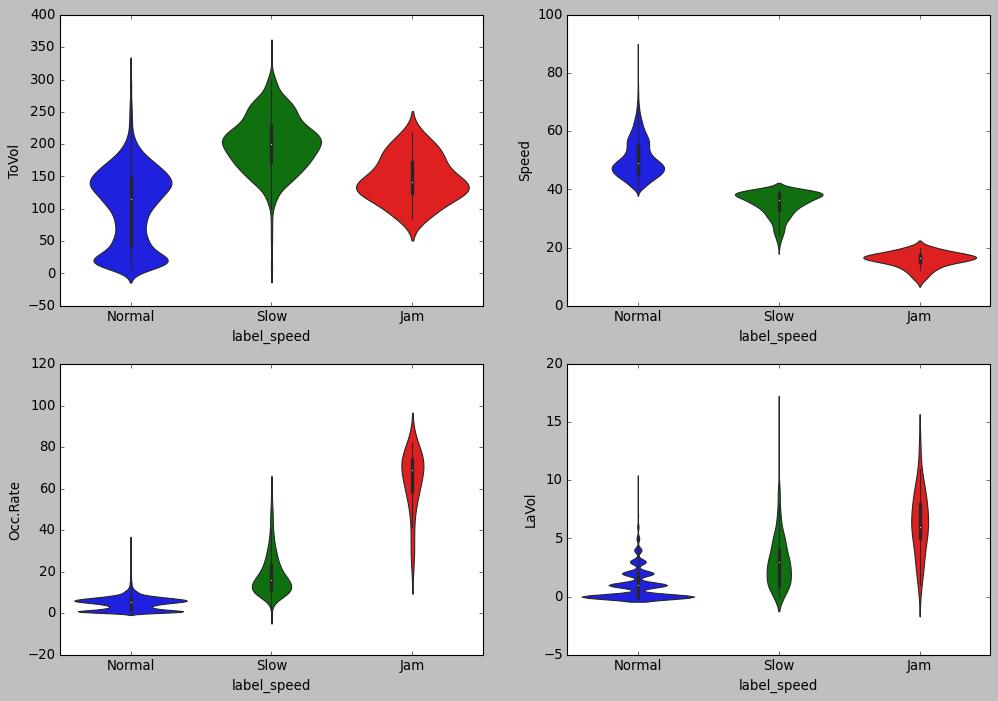

In [37]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(x='label_speed',y='ToVol',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='label_speed',y='Speed',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='label_speed',y='Occ.Rate',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='label_speed',y='LaVol',data=df)

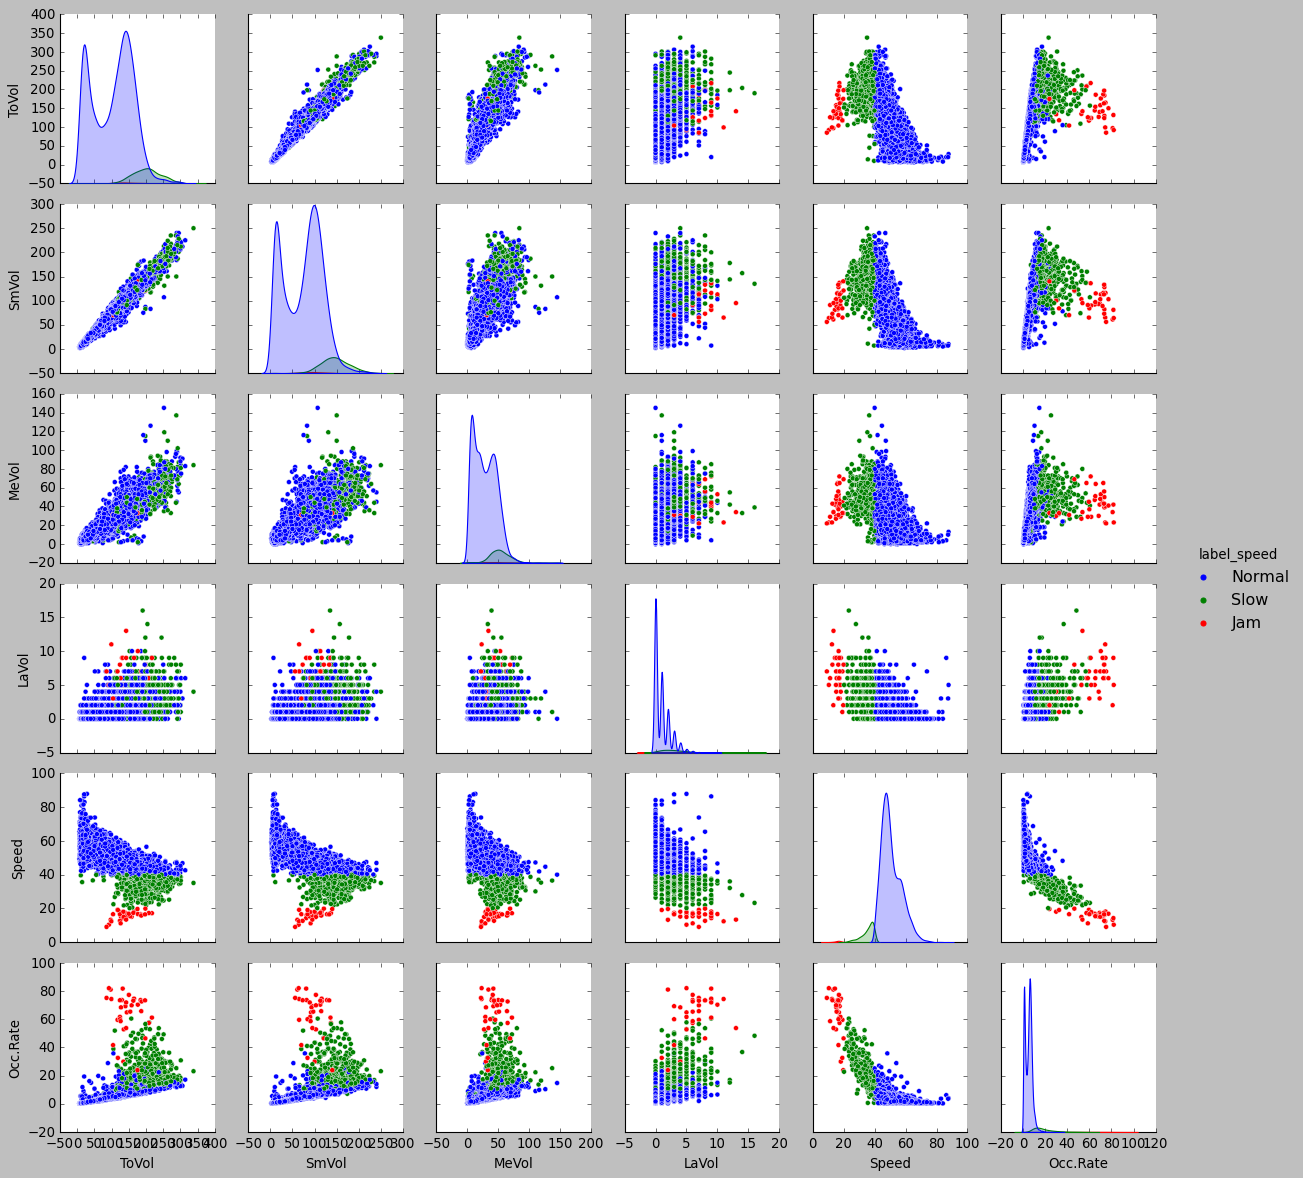

In [38]:
sns.pairplot(df,hue='label_speed')

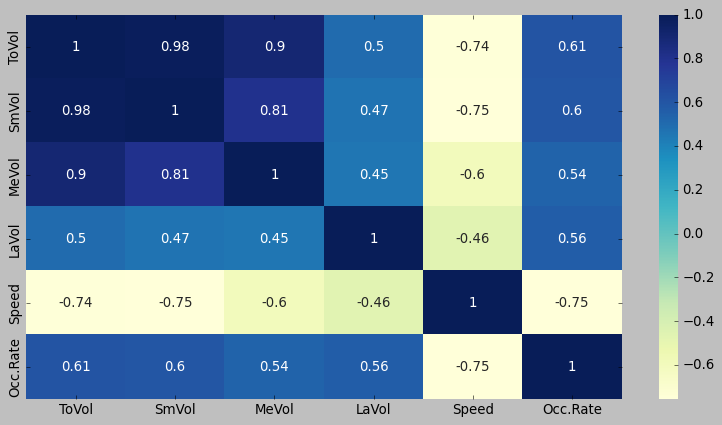

In [39]:
plt.figure(figsize=(12,6)) 
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()